In [32]:
import tensorflow_hub as hub
import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import cv2

from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [33]:
content_image = cv2.imread('/content/gdrive/My Drive/data/style_transfer/content/art.png')
style_image   = cv2.imread('/content/gdrive/My Drive/data/style_transfer/style/starrynight.png')

print(content_image.shape)

(511, 640, 3)


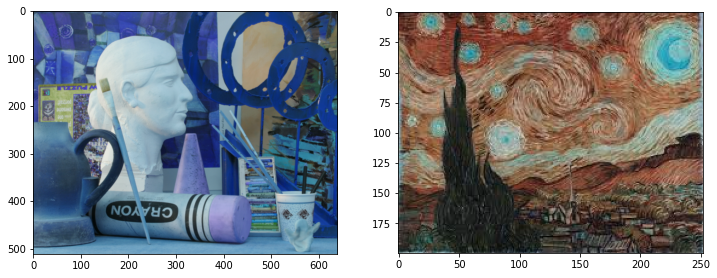

In [34]:
plt.subplot(1, 2, 1)
plt.imshow(content_image)

plt.subplot(1, 2, 2)
plt.imshow(style_image)

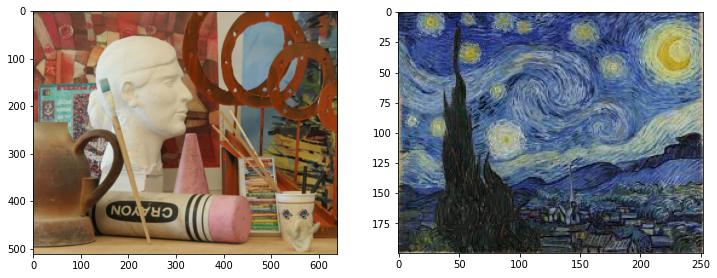

In [35]:
content_image = cv2.cvtColor(content_image, cv2.COLOR_BGR2RGB)
style_image   = cv2.cvtColor(style_image, cv2.COLOR_BGR2RGB)

plt.subplot(1, 2, 1)
plt.imshow(content_image)

plt.subplot(1, 2, 2)
plt.imshow(style_image)

In [36]:
content_image = tf.expand_dims(content_image, axis=0)
style_image   = tf.expand_dims(style_image, axis=0)

content_image = tf.dtypes.cast(content_image, tf.float32)
style_image   = tf.dtypes.cast(style_image, tf.float32)

print(content_image.shape)
print(style_image.shape)

(1, 511, 640, 3)
(1, 200, 252, 3)


(1, 512, 640, 3)


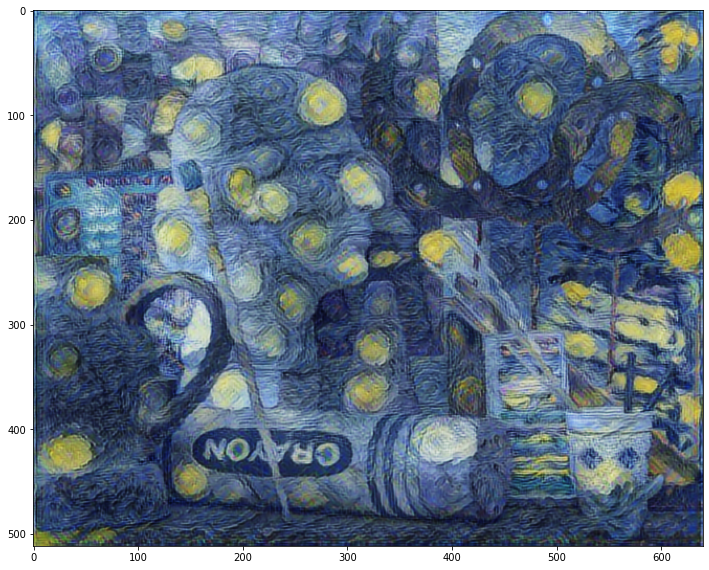

In [37]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = model(content_image/255.0, style_image/255.0)[0]

print(stylized_image.shape)
plt.imshow(stylized_image[0])